# Przetwarzanie sygnałów i obrazów: Sprawozdanie 003

### Temat: Dyskretne przekształcenie Fouriera.
### Imię i nazwisko studenta: Paweł Niewiarowski, Szymon Łupiński
### Data realizacji ćwiczenia: 02.11.2022

In [2]:
from matplotlib import pyplot
import numpy as np

##

## Zadanie 3.1
Wygeneruj dokładnie 1 okres fali sinusoidalnej (32 lub 64 próbki). Sporządź wykresy sinusoidy i jej transformaty Fouriera (funkcja fft) w jednym oknie (część rzeczywistą - real, urojoną - imag, moduł - absolute i kąt - angle).
Co możesz powiedzieć o symetrii widma zespolonego?

Odpowiedź: Symetria środka widma zespolonego jest odwrócona.

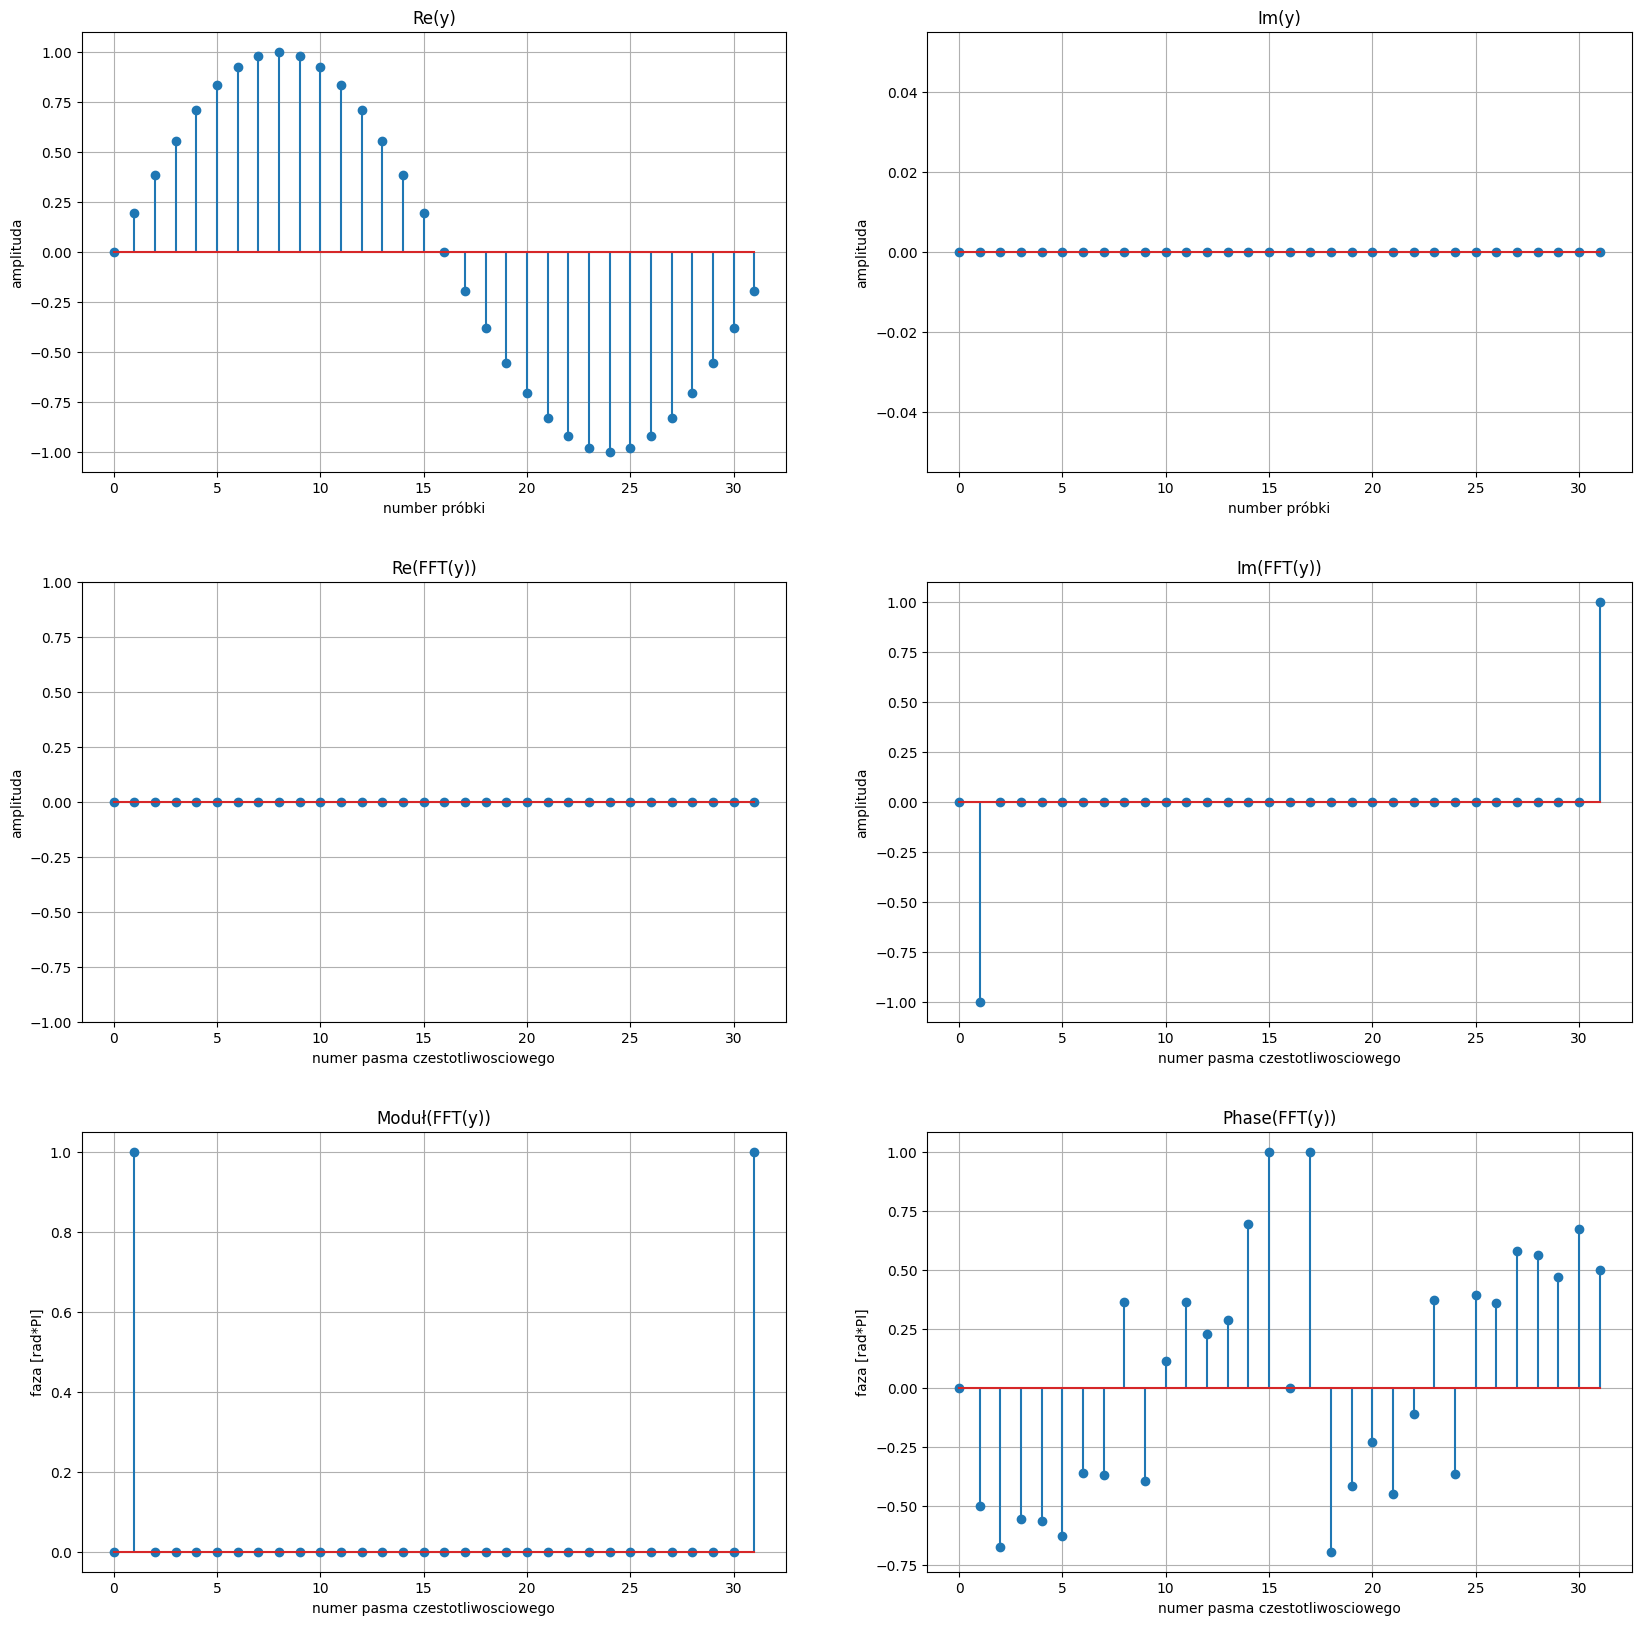

In [31]:
N: int = 32


class Stem:
    def __init__(self, x_values, y_values, title,
                 x_label, y_label, ax, y_lim=None):
        self.x_values = x_values
        self.y_values = y_values
        self.title = title
        self.x_label = x_label
        self.y_label = y_label
        self.ax = ax
        self.y_lim = y_lim

    def draw(self):
        self.ax.stem(self.x_values, self.y_values)
        self.ax.set_title(self.title)
        self.ax.set_xlabel(self.x_label)
        self.ax.set_ylabel(self.y_label)
        self.ax.grid()
        if self.y_lim:
            self.ax.set_ylim(self.y_lim[0], self.y_lim[1])


x_values: np.ndarray = np.arange(0, N)
y_values: np.ndarray = np.sin(2 * np.pi * x_values / N)
y_values_fourier: np.ndarray = 2 * np.fft.fft(y_values) / N

fig, axs = pyplot.subplots(3, 2)
fig.set_size_inches(20, 20)

for stem in [
    Stem(x_values, y_values, 'Re(y)', 'number próbki', 'amplituda', axs[0][0]),
    Stem(x_values, np.imag(y_values), 'Im(y)', 'number próbki', 'amplituda', axs[0][1]),
    Stem(x_values, np.real(y_values_fourier), 'Re(FFT(y))', 'numer pasma czestotliwosciowego', 'amplituda', axs[1][0],
         (-1, 1)),
    Stem(x_values, np.imag(y_values_fourier), 'Im(FFT(y))', 'numer pasma czestotliwosciowego', 'amplituda', axs[1][1]),
    Stem(x_values, np.abs(y_values_fourier), 'Moduł(FFT(y))', 'numer pasma czestotliwosciowego', 'faza [rad*PI]',
         axs[2][0]),
    Stem(x_values, np.angle(y_values_fourier) / np.pi, 'Phase(FFT(y))', 'numer pasma czestotliwosciowego',
         'faza [rad*PI]', axs[2][1]),
]:
    stem.draw()

pyplot.subplots_adjust(hspace=0.25)
pyplot.show()
